# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [34]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file= "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [35]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

n_valid = len(X_valid)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_valid)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

11


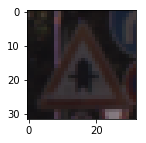

In [36]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(2,2))
plt.imshow(image)
print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Normalizing...
Completed

Normalizing...
Completed

Normalizing...
Completed



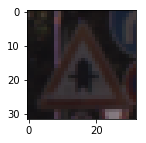

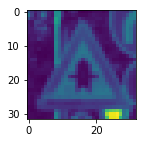

In [37]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
import cv2

def grayImage(img):
    gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return gray_image

def imgNormalize(X_data):
    X_norm = []
    print("Normalizing...")
    for img in range (0, len(X_data)):
        gray_image = grayImage(X_data[img])
        norm_img = gray_image
        norm_img = cv2.normalize(gray_image, norm_img, alpha=-1, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        X_norm.append(np.resize([norm_img], (32,32,1)))     
    print("Completed")
    print()
    return X_norm

#print random image from the training dataset before is processed
image = X_train[index].squeeze()
plt.figure(figsize=(2,2))
plt.imshow(image)

X_train = imgNormalize(X_train)
X_valid = imgNormalize(X_valid)
X_test = imgNormalize(X_test)

#print random image from the training dataset after is processed
image = X_train[index].squeeze()
plt.figure(figsize=(2,2))
plt.imshow(image)

### Model Architecture

In [38]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 128

In [40]:
from tensorflow.contrib.layers import flatten

def convNet(x, KEE_PROB):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    #Layer 1: Convolutional. Input = 32x32x1. Output = 30x30x9
    conv1_w = tf.Variable(tf.truncated_normal(shape=(3,3,1,9), mean=mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(9))
    conv1 = tf.nn.conv2d(x, conv1_w, strides=[1,1,1,1], padding="VALID")
    conv1 = tf.nn.bias_add(conv1, conv1_b)
    
    #Layer 1 Activation
    conv1 = tf.nn.relu(conv1)
    
    #Layer 2: Convolutional. Input = 30x30x9. Output = 28x28x18
    conv2_w = tf.Variable(tf.truncated_normal(shape=(3,3,9,18), mean=mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(18))
    conv2 = tf.nn.conv2d(conv1, conv2_w, strides=[1,1,1,1], padding="VALID")
    conv2 = tf.nn.bias_add(conv2, conv2_b)
    
    #Layer 2 Activation
    conv2 = tf.nn.relu(conv2)
    
    #Layer 2 Pooling - Input = 28x28x18. Output = 14x14x18
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
    
    #Layer 3: Convolutional. Input = 14x14x18. Output = 12x12x32
    conv3_w = tf.Variable(tf.truncated_normal(shape=(3,3,18,32), mean=mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(32))
    conv3 = tf.nn.conv2d(conv2, conv3_w, strides=[1,1,1,1], padding="VALID")
    conv3 = tf.nn.bias_add(conv3, conv3_b)
    
    #Layer 3 Activation
    conv3 = tf.nn.relu(conv3)
    
    #Layer 4: Convolutional. Input = 12x12x32. Output = 10x10x64
    conv4_w = tf.Variable(tf.truncated_normal(shape=(3,3,32,64), mean=mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(64))
    conv4 = tf.nn.conv2d(conv3, conv4_w, strides=[1,1,1,1], padding="VALID")
    conv4 = tf.nn.bias_add(conv4, conv4_b)
    
    #Layer 4 Activation
    conv4 = tf.nn.relu(conv4)
    
    #Layer 4 Dropout
    conv4 = tf.nn.dropout(conv4, KEE_PROB)
    
    #Layer 5: Convolutional. Input = 10x10x64. Output = 8x8x128
    conv5_w = tf.Variable(tf.truncated_normal(shape=(3,3,64,128), mean=mu, stddev = sigma))
    conv5_b = tf.Variable(tf.zeros(128))
    conv5 = tf.nn.conv2d(conv4, conv5_w, strides=[1,1,1,1], padding="VALID")
    conv5 = tf.nn.bias_add(conv5, conv5_b)
    
    #Layer 5 Activation
    conv5 = tf.nn.relu(conv5)
    
    #Layer 5 Pooling - Input = 8x8x128. Output = 4x4x128
    conv5 = tf.nn.max_pool(conv5, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
        
    #Flatten. Input = 4x4x128. Output = 2048 (4*4*128)
    fc0 = flatten(conv5)
    
    #Layer 6: Fully Connected. Input = 2048. Output = 1024.
    fc1_w = tf.Variable(tf.truncated_normal(shape=(2048,1024), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1024))
    fc1 = tf.matmul(fc0, fc1_w) + fc1_b
    
    #Layer 6 Activation
    fc1 = tf.nn.relu(fc1)
    
    #Layer 7: Fully Connected. Input = 1024. Output = 512.
    fc2_w = tf.Variable(tf.truncated_normal(shape=(1024,512), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(512))
    fc2 = tf.matmul(fc1, fc2_w) + fc2_b
    
    #Layer 7 Activation
    fc2 = tf.nn.relu(fc2)
    
    #Layer 8: Fully Connected. Input = 512. Output = 256.
    fc3_w = tf.Variable(tf.truncated_normal(shape=(512,256), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(256))
    fc3 = tf.matmul(fc2, fc3_w) + fc3_b
    
    #Layer 8 Activation
    fc3 = tf.nn.relu(fc3)
    
    #Layer 8 Dropout
    fc3 = tf.nn.dropout(fc3, KEE_PROB)
    
    #Layer 9: Fully Connected. Input = 256. Output = 128.
    fc4_w = tf.Variable(tf.truncated_normal(shape=(256,128), mean = mu, stddev = sigma))
    fc4_b = tf.Variable(tf.zeros(128))
    fc4 = tf.matmul(fc3, fc4_w) + fc4_b
    
    #Layer 9 Activation
    fc4 = tf.nn.relu(fc4)
    
    #Layer 10: Fully Connected. Input = 128. Output = 43.
    fc5_w = tf.Variable(tf.truncated_normal(shape=(128,43), mean = mu, stddev = sigma))
    fc5_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc4, fc5_w) + fc5_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [41]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

#Features and Labels
x = tf.placeholder(tf.float32, (None, 32,32, 1))
y = tf.placeholder(tf.int32, (None))
KEEP_PROB = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

#Training Pipeline
rate = 0.001

logits = convNet(x, KEEP_PROB)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [42]:
#Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, KEEP_PROB: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [43]:
#Train the Model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            batch_x, batch_y = X_train[offset:offset+BATCH_SIZE], y_train[offset:offset+BATCH_SIZE]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, KEEP_PROB: 0.6})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        train_accuracy = evaluate(X_train, y_train)
        print("EPOCH {}...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print()
    
    saver.save(sess, './convnet')
    print("Model Saved")

Training...

EPOCH 1...
Validation Accuracy = 0.918
Train Accuracy = 0.953

EPOCH 2...
Validation Accuracy = 0.966
Train Accuracy = 0.989

EPOCH 3...
Validation Accuracy = 0.972
Train Accuracy = 0.995

EPOCH 4...
Validation Accuracy = 0.963
Train Accuracy = 0.995

EPOCH 5...
Validation Accuracy = 0.976
Train Accuracy = 0.997

EPOCH 6...
Validation Accuracy = 0.978
Train Accuracy = 0.998

EPOCH 7...
Validation Accuracy = 0.981
Train Accuracy = 0.997

EPOCH 8...
Validation Accuracy = 0.985
Train Accuracy = 0.999

EPOCH 9...
Validation Accuracy = 0.974
Train Accuracy = 0.999

EPOCH 10...
Validation Accuracy = 0.967
Train Accuracy = 0.997

EPOCH 11...
Validation Accuracy = 0.983
Train Accuracy = 0.999

EPOCH 12...
Validation Accuracy = 0.979
Train Accuracy = 0.999

EPOCH 13...
Validation Accuracy = 0.983
Train Accuracy = 0.998

EPOCH 14...
Validation Accuracy = 0.984
Train Accuracy = 0.999

EPOCH 15...
Validation Accuracy = 0.985
Train Accuracy = 1.000

EPOCH 16...
Validation Accuracy = 0.

In [44]:
#Test Model on Test Set
with tf.Session() as sess:
    print("Getting Test Accuracy...")
    print()
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Getting Test Accuracy...

Test Accuracy = 0.964


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Image data shape = (32, 32, 3)
8


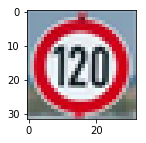

In [45]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os
import matplotlib.image as mpimg

arr_img = os.listdir("test-signs-data/")
X_m = []
y_m = [1,37,27,34,17,31,12,5,13,9,33,4,8]
y_labels = [
    "'30'",
    "'Go Straight or Left'",
    "'Pedestrians'",
    "'Turn Left Ahead'",
    "'No Entry'",
    "'Wild Animals Crossing'",
    "'Priority Road'",
    "'80'",
    "'Yeld'",
    "'No Passing'",
    "'Turn Right Ahead'",
    "'70'",
    "'120'"
]

for img_name in arr_img:    
    X_m.append(mpimg.imread('test-signs-data/' + img_name))
    
index = random.randint(0, len(X_m))
index = 12
image = X_m[index].squeeze()
image_shape = image.shape
print("Image data shape =", image_shape)

plt.figure(figsize=(2,2))
plt.imshow(image)
print(y_m[index]) 

### Predict the Sign Type for Each Image

In [46]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

#Normalize Test Data
X_m = imgNormalize(X_m)

predictions = tf.argmax(logits,1)
    
with tf.Session() as sess:
    print("Starting predictions...")
    print()
    
    saver.restore(sess, tf.train.latest_checkpoint('.'))   

    for img in range(0, len(X_m)):
        class1 = sess.run(predictions, feed_dict={x: [X_m[img]], KEEP_PROB: 1})
        print("Prediction for Sign:")
        print(y_labels[img])
        print(class1)
        print()
        
    print("Predictions Completed.")

Normalizing...
Completed

Starting predictions...

Prediction for Sign:
'30'
[1]

Prediction for Sign:
'Go Straight or Left'
[37]

Prediction for Sign:
'Pedestrians'
[18]

Prediction for Sign:
'Turn Left Ahead'
[34]

Prediction for Sign:
'No Entry'
[17]

Prediction for Sign:
'Wild Animals Crossing'
[31]

Prediction for Sign:
'Priority Road'
[12]

Prediction for Sign:
'80'
[1]

Prediction for Sign:
'Yeld'
[13]

Prediction for Sign:
'No Passing'
[9]

Prediction for Sign:
'Turn Right Ahead'
[33]

Prediction for Sign:
'70'
[4]

Prediction for Sign:
'120'
[8]

Predictions Completed.


### Analyze Performance

In [47]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    print("Getting my accuracy...")
    print()
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    m_accuracy = evaluate(X_m, y_m)
    print("My Accuracy = {:.3f}".format(m_accuracy))

Getting my accuracy...

My Accuracy = 0.846


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [48]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

softmax = tf.nn.softmax(logits)

with tf.Session() as sess:
    print("Starting probabilities...")
    print()
    
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    for img in range(0, len(X_m)):
        result = sess.run(softmax, feed_dict = { x: [X_m[img]],  KEEP_PROB: 1 })
        values, indices = tf.nn.top_k(result, 5)
        probs = sess.run(values)
        predictions = sess.run(indices)

        print("Top 5 Probabilites for Sign:")
        print(y_labels[img])
        print(probs)
        print(predictions)
        print()
        
    print("Probabilities completed.")
    print()

Starting probabilities...

Top 5 Probabilites for Sign:
'30'
[[  1.00000000e+00   1.30016888e-13   1.20461108e-16   8.47939615e-20
    5.84411130e-22]]
[[1 5 4 2 7]]

Top 5 Probabilites for Sign:
'Go Straight or Left'
[[  1.00000000e+00   8.24804071e-19   6.15190765e-20   1.42098411e-21
    1.00843606e-21]]
[[37 23 31 21 26]]

Top 5 Probabilites for Sign:
'Pedestrians'
[[  1.00000000e+00   1.06048166e-08   4.52109988e-10   3.10435344e-10
    2.10107154e-10]]
[[18 26 27 11  1]]

Top 5 Probabilites for Sign:
'Turn Left Ahead'
[[  1.00000000e+00   5.24670405e-08   5.35328393e-10   6.99936550e-12
    3.79658631e-12]]
[[34 35 16  9 11]]

Top 5 Probabilites for Sign:
'No Entry'
[[  1.00000000e+00   1.56649855e-34   6.47546490e-35   1.08045100e-35
    4.44157678e-36]]
[[17 41  9 30 33]]

Top 5 Probabilites for Sign:
'Wild Animals Crossing'
[[  1.00000000e+00   9.58352213e-13   9.75562472e-14   1.02572403e-14
    4.69143068e-16]]
[[31 23 37 21 18]]

Top 5 Probabilites for Sign:
'Priority Road'

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [49]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input = image already normalized
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
               

#conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 1, 9), mean = 0, stddev = 0.1))
#conv1_b = tf.Variable(tf.zeros(9))
#conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

#with tf.Session() as sess:
#    print("Starting Features Map Plot...")
#    print()
    
#    saver.restore(sess, tf.train.latest_checkpoint('.'))
#    outputFeatureMap(np.resize([X_m[1]], (32,32,1)), conv1)

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 